<a href="https://colab.research.google.com/github/suongnhibrady/school-projects/blob/main/Python_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
#an exploration of nypd arrest data
#python project 3
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [53]:
#list of every shooting incident that occurred in NYC during the current calendar year.
df = pd.read_csv('/NYPD_Shooting_Incident_Data__Year_To_Date__20250414.csv')

In [54]:
#initial comparison borough: QUEENS
#compare Queens to other NY boroughs; how many shootings taking place in bar/night clubs
df.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,LOC_OF_OCCUR_DESC,PRECINCT,JURISDICTION_CODE,LOC_CLASSFCTN_DESC,LOCATION_DESC,STATISTICAL_MURDER_FLAG,...,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,288208649,06/08/2024,3:00:00,QUEENS,OUTSIDE,110,0,STREET,(null),N,...,M,WHITE HISPANIC,25-44,M,WHITE HISPANIC,1019164,210169,NaN,NaN,NaN
1,283404608,03/07/2024,16:14:00,BRONX,OUTSIDE,40,0,STREET,(null),Y,...,M,BLACK,<18,M,BLACK,1005028,234516,NaN,NaN,NaN
2,281486708,02/01/2024,8:17:00,QUEENS,OUTSIDE,113,0,COMMERCIAL,BAR/NIGHT CLUB,N,...,(null),(null),25-44,M,BLACK,1046315,187088,NaN,NaN,NaN
3,280179979,01/08/2024,18:30:00,BROOKLYN,OUTSIDE,79,2,HOUSING,MULTI DWELL - PUBLIC HOUS,N,...,M,BLACK,25-44,M,BLACK,999496,190300,NaN,NaN,NaN
4,289111780,06/25/2024,23:45:00,BRONX,OUTSIDE,42,0,STREET,(null),N,...,M,BLACK,18-24,M,BLACK,1008690,238862,NaN,NaN,NaN


In [55]:
df.columns

Index(['INCIDENT_KEY', 'OCCUR_DATE', 'OCCUR_TIME', 'BORO', 'LOC_OF_OCCUR_DESC',
       'PRECINCT', 'JURISDICTION_CODE', 'LOC_CLASSFCTN_DESC', 'LOCATION_DESC',
       'STATISTICAL_MURDER_FLAG', 'PERP_AGE_GROUP', 'PERP_SEX', 'PERP_RACE',
       'VIC_AGE_GROUP', 'VIC_SEX', 'VIC_RACE', 'X_COORD_CD', 'Y_COORD_CD',
       'Latitude', 'Longitude', 'New Georeferenced Column'],
      dtype='object')

In [56]:
#cleaning
df.drop_duplicates(inplace=True)
df.dropna(subset=['LOCATION_DESC'], inplace=True)
df.drop([
    'OCCUR_DATE', 'STATISTICAL_MURDER_FLAG', 'PERP_AGE_GROUP',
    'PERP_SEX', 'PERP_RACE', 'VIC_AGE_GROUP', 'VIC_SEX', 'VIC_RACE'
], axis=1, inplace=True)

In [67]:
#count instances
df2=df['BORO'][df['LOCATION_DESC'].str.contains('BAR/NIGHT CLUB')].value_counts()
print(df2)

BORO
QUEENS       14
MANHATTAN     5
BROOKLYN      4
BRONX         4
Name: count, dtype: int64


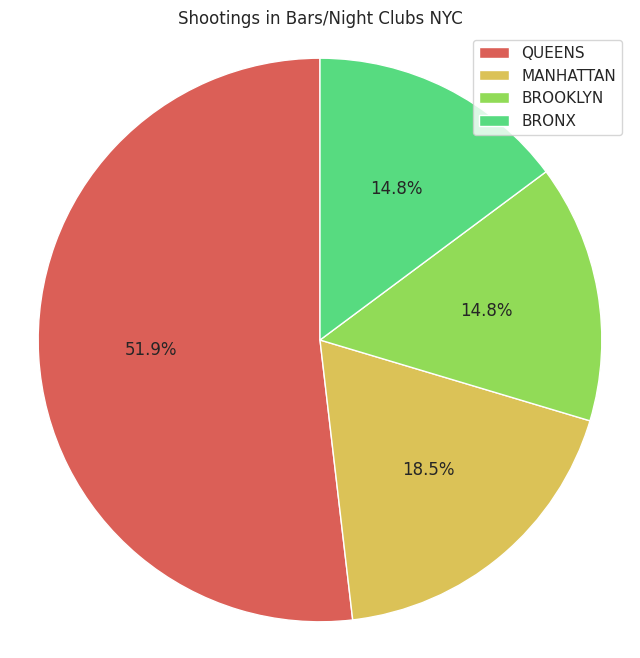

In [98]:
#pie chart
plt.figure(figsize=(8, 8))
plt.pie(df2.values, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("hls",8))
plt.title("Shootings in Bars/Night Clubs NYC")
plt.axis('equal')
plt.legend(df2.index)
plt.show()

## In Conclusion
As of April 15th, 2025, Queens has recorded more shootings in bars and nightclubs than all other NYC boroughs combined. There may be a more diverse nightlife scene in Queens, or the data may reflect disparities in reporting or law enforcement practices across boroughs.